## Comparación entre Suffix trie, suffix tree y suffix array

Suffix trie
Arbol de prefijos que representa todos los sufijos de la cadena S de longitud n. Cada nodo contiene un solo caracter y cada camino desde la raiz representa un sufijo distinto de S.

La complejidad computacional es de O(n^2) debido a la insercion repetidoda de sufijos crecientes. Adicionalmente las busquedas exactas en tiempo O(m) donde m es la longitud del patron.  

Espacio y tiempo de contruccion O(n^2)


Suffix Tree
Es una compresion de suffis trie ya que agrupa ramas lineales con un solo hijo en una unica arista etiquetada con una subcadena. Cada hoja representa un sufijo y los nodos internos representan substrings repertidos.

La complejidad alcanzada es en espacio y tiempo de construccion toma O(n) y la busqueda de los patrones en tiempo O(m).

Suffix array
El suffix array es un arreglo que contiene los indices inciales de los sufijos ordenados lexicograficamente de la cadena S. A menuo se acompaña de un arreglo longest common prefix para emular operaciones del suffix tree.

La complejidad computacional en espacio es de O(n) y el tiempo de construccion es O(n log n).



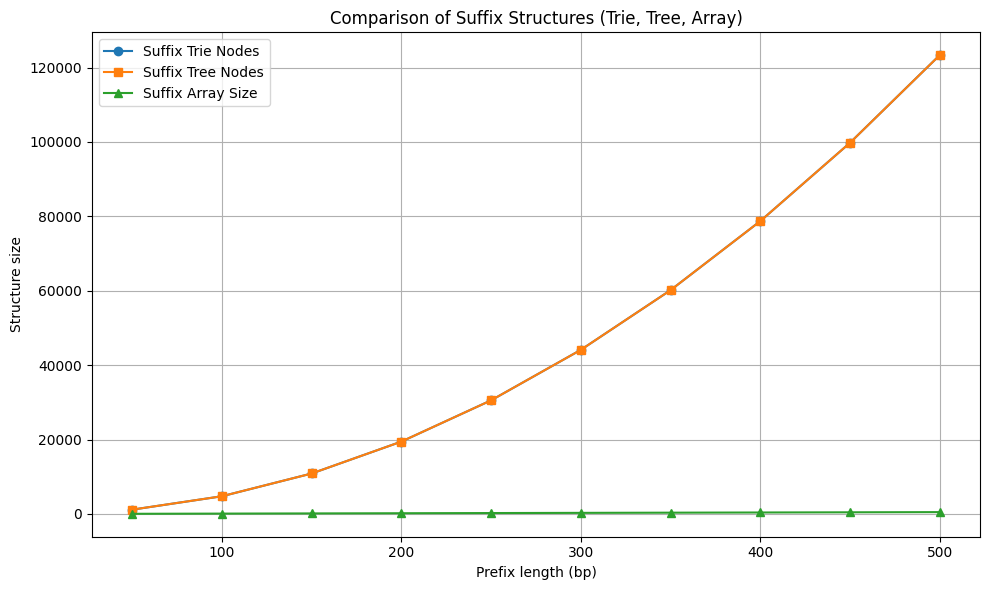

In [ ]:
import re
import matplotlib.pyplot as plt

# === 1. Secuencia del genoma del fago lambda ===
raw_origin = """
        1 gggcggcgac ctcgcgggtt ttcgctattt atgaaaattt tccggtttaa ggcgtttccg
       61 ttcttcttcg tcataactta atgtttttat ttaaaatacc ctctgaaaag aaaggaaacg
      121 acaggtgctg aaagcgaggc tttttggcct ctgtcgtttc ctttctctgt ttttgtccgt
      181 ggaatgaaca atggaagtca acaaaaagca gctggctgac attttcggtg cgagtatccg
      241 taccattcag aactggcagg aacagggaat gcccgttctg cgaggcggtg gcaagggtaa
      301 tgaggtgctt tatgactctg ccgccgtcat aaaatggtat gccgaaaggg atgctgaaat
      361 tgagaacgaa aagctgcgcc gggaggttga agaactgcgg caggccagcg aggcagatct
      421 ccagccagga actattgagt acgaacgcca tcgacttacg cgtgcgcagg ccgacgcaca
      481 ggaactgaag aatgccagag actccgctga agtggtggaa accgcattct gtactttcgt
      541 gctgtcgcgg atcgcaggtg aaattgccag tattctcgac gggctccccc tgtcggtgca
      601 gcggcgtttt ccggaactgg aaaaccgaca tgttgatttc ctgaaacggg atatcatcaa
      661 agccatgaac aaagcagccg cgctggatga actgataccg gggttgctga gtgaatatat
      721 cgaacagtca aggttaacagg ctgcggcatt ttgtccgcgc cgggcttcgc tcactgttca
      781 ggccggagcc acagaccgcc gttgaatggg cggatgctaa ttactatctc ccgaaagaat
      841 ccgcatacca ggaagggcgc tgggaaacac tgccctttca gcgggccatc atgaatgcga
      901 tgggcagcga ctacatccgt gaggtgaatg tggtgaagtc tgcccgtgtc ggttattcca
      961 aaatgctgct gggtgtttat gcctacttta tagagcataa gcagcgcaac acccttatct
     1021 ggttgccgac ggatggtgat gccgagaact ttatgaaaac ccacgttgag ccgactattc
     1081 gtgatattcc gtcgctgctg gcgctggccc cgtggtatgg caaaaagcac cgggataaca
     1141 cgctcaccat gaagcgtttc actaatgggc gtggcttctg gtgcctgggc ggtaaagcgg
     1201 caaaaaacta ccgtgaaaag tcggtggatg tggcgggtta tgatgaactt gc
"""

# === 2. Limpiar la secuencia ===
cleaned = re.sub(r'\d+', '', raw_origin).replace(" ", "").replace("\n", "").upper()

# === 3. Suffix Trie ===
class SuffixTrieNode:
    def __init__(self):
        self.children = {}

def build_suffix_trie(text):
    root = SuffixTrieNode()
    for i in range(len(text)):
        current = root
        for c in text[i:]:
            if c not in current.children:
                current.children[c] = SuffixTrieNode()
            current = current.children[c]
    return root

def count_trie_nodes(node):
    count = 1
    for child in node.children.values():
        count += count_trie_nodes(child)
    return count

# === 4. Suffix Tree (simplificado como Trie compactado) ===
class SuffixTreeNode:
    def __init__(self):
        self.children = {}

def build_suffix_tree(text):
    root = SuffixTreeNode()
    for i in range(len(text)):
        current = root
        for c in text[i:]:
            if c not in current.children:
                current.children[c] = SuffixTreeNode()
            current = current.children[c]
    return root

def count_tree_nodes(node):
    count = 1
    for child in node.children.values():
        count += count_tree_nodes(child)
    return count

# === 5. Suffix Array ===
def build_suffix_array(text):
    return sorted(range(len(text)), key=lambda i: text[i:])

# === 6. Análisis para longitudes crecientes ===
prefix_lengths = list(range(50, 501, 50))
trie_nodes = []
tree_nodes = []
array_sizes = []

for length in prefix_lengths:
    prefix_seq = cleaned[:length]

    # Trie
    trie_root = build_suffix_trie(prefix_seq)
    trie_nodes.append(count_trie_nodes(trie_root))

    # Tree
    tree_root = build_suffix_tree(prefix_seq)
    tree_nodes.append(count_tree_nodes(tree_root))

    # Suffix array
    suffix_array = build_suffix_array(prefix_seq)
    array_sizes.append(len(suffix_array))

# === 7. Graficar ===
plt.figure(figsize=(10, 6))
plt.plot(prefix_lengths, trie_nodes, label="Suffix Trie Nodes", marker='o')
plt.plot(prefix_lengths, tree_nodes, label="Suffix Tree Nodes", marker='s')
plt.plot(prefix_lengths, array_sizes, label="Suffix Array Size", marker='^')
plt.xlabel("Prefix length (bp)")
plt.ylabel("Structure size")
plt.title("Comparison of Suffix Structures (Trie, Tree, Array)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()
